# **Polynomial Regression Model Analysis with Training and Validation Loss Evaluation**


The following script I tried to fit polynomial regression models of orders 1, 4, and 8 (as examples) to a dataset and evaluate their performance based on training and validation losses. The dataset used here representing the gold medal winning time for the men’s 100m at each of the Olympic Games held since 1896 (taken from "A first course in maching learning" book). The idea or the aim of this work is to demonstrate how increasing model complexity can lead to overfitting. Here’s a breakdown of how it works:

### Importing Libraries:

First of all, my code starts by importing the **numpy** library, as well as **maplotlib** for plots. Also, the **MinMaxScaler** to scale our data as we are working on the Olympic 100m dataset.

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

### Data Loading and Scaling:

In the following cell, I started by loading the dataset from a CSV file using np.loadtxt. The first column represents the feature x representing the Olympid year, while the second column represents the target variable t, the winning time in seconds. The feature x is then scaled using MinMax scaling to ensure it lies between 0 and 1. "L" is the number of samples in the training set.

In [4]:
# Load data
data = np.loadtxt('data100m.csv', delimiter=',')
L = 19
orders = [1, 4, 8]

def scaled_data(data):
    x, t = data[:, 0][:, None], data[:, 1][:, None]
    x = MinMaxScaler().fit_transform(x)
    return x, t

### Model Fitting: 

The following part involves fitting polynomial regression models of varying degrees (orders) using **np.polyfit**. The orders to be evaluated are specified in the list orders = [1, 4, 8] declared above.

In [5]:
def calcul(x, valx, t, i):
    w = np.polyfit(x.flatten(), t.flatten(), i-1)[::-1][:, np.newaxis]
    X = np.vander(x.flatten(), i, increasing=True)
    valX = np.vander(valx.flatten(), i, increasing=True)
    return w, X, valX

Here:
* **w** represents the model weights.
* **X** and **valX** represent the feature matrices for training and validation data, respectively, using a Vandermonde matrix to represent polynomial terms.

### Error Calculation:

The **error_calcul** function computes both the training and validation losses for each polynomial model using the **mean squared error (MSE)**. The results are printed for each model order.

In [9]:
def error_calcul(X, t, valX, valt, w, model_order):
    training_loss = np.mean((X @ w - t) ** 2)
    validation_loss = np.mean((valX @ w - valt) ** 2)
    print(f'Model order: {model_order}, Training loss: {training_loss}, Validation loss: {validation_loss}')
    return training_loss, validation_loss

### Plotting and Visualization:

The **line_plot** function generates predicted values for a given range of x values and overlays these predictions on a plot. Additionally, the **data_plot** function plots the original training and validation points for comparison.

In [10]:
def line_plot(plotx, w, i):
    t_pred = sum(w[k] * (plotx ** k) for k in range(i))
    plt.plot(plotx, t_pred)


def data_plot(x, t, valx, valt):
    plt.scatter(x, t, color="m", marker="o", s=30, label='Training')
    plt.scatter(valx, valt, color="y", marker="o", s=30, label='Validation')
    plt.xlabel("x")
    plt.ylabel("t")

### Main Execution Flow:

In the **main** function, the data is split into training and validation sets. The models are fitted, and errors are calculated for each specified polynomial order. The results are displayed both as plots and text output.

In [13]:
def main():
    x, t = scaled_data(data)
    valx, valt = x[L:], t[L:]
    x, t = x[:L], t[:L]
    plotx = np.arange(np.min(x), np.max(valx) + 0.01, 0.01)
    plt.ylim((9, 12))
    data_plot(x, t, valx, valt)
    for i in orders:
        w, X, valX = calcul(x, valx, t, i+1)
        line_plot(plotx, w, i+1)
        error_calcul(X, t, valX, valt, w, i)
    plt.legend()
    plt.show()

Model order: 1, Training loss: 0.058184533580366335, Validation loss: 0.10109614634607397
Model order: 4, Training loss: 0.030099586020146653, Validation loss: 7.465386421927162
Model order: 8, Training loss: 0.016751265823497907, Validation loss: 16283.43228891417


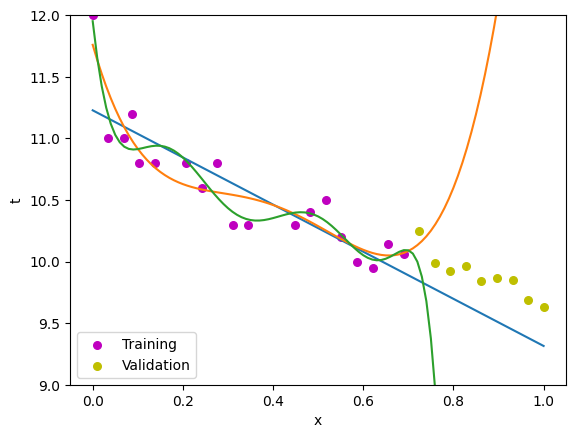

In [14]:
if __name__ == "__main__":
    main()

### Explanation of the Results:

* Model Order 1: The training loss is low (0.0582), and the validation loss is also reasonably low (0.1011). This indicates a good balance between model complexity and generalization.
* Model Order 4: The training loss is very low (0.0301), but the validation loss (7.4654) increases significantly, suggesting the model is starting to overfit.
* Model Order 8: The training loss is almost negligible (0.0168), but the validation loss explodes to an astronomical value (16283.4323), a clear sign of severe overfitting. The model has learned the training data too well and fails to generalize.

These results highlight the importance of selecting an appropriate model complexity to avoid overfitting while still capturing the underlying patterns in the data.

# **Conclusion:**

In this project I attempted to demonstrate the practical challenges of polynomial regression and model selection when working with data. As the complexity of the model increases (i.e., higher polynomial orders), the training loss tends to decrease, reflecting a better fit to the training data. However, this improved training performance often comes at the cost of generalization, as seen by the rapidly increasing validation loss in more complex models.

Key takeaways from this project include:

* **The Bias-Variance Tradeoff:** Lower-order models (e.g., degree 1) might underfit, failing to capture the nuances in the data, but they typically generalize better. In contrast, higher-order models (e.g., degree 8) tend to overfit by capturing noise and irrelevant fluctuations in the training data, leading to poor performance on new, unseen data.

* **Overfitting in High-Order Models:** The drastic difference between training and validation loss in higher-order models is a clear indication of overfitting. While the model fits the training data almost perfectly, it fails to generalize, leading to extremely high errors when applied to validation data.

* **The Need for Model Evaluation:** The results emphasize the importance of using both training and validation errors when evaluating model performance. Simply focusing on minimizing training loss can be misleading, as it does not guarantee good predictive performance on new data.

In summary, this project highlights that in real-world applications, simpler models often provide better generalization, while overly complex models may lead to poor performance despite appearing highly accurate during training. The goal is to strike a balance between model complexity and the ability to generalize, avoiding both underfitting and overfitting.